In [1]:
from emulator_utils.pre_process import minmax, standard, standard_minmax, log_standard, unscale, custom
from emulator_utils.read_data import readpowerspec, readpolspice, readcorr
from emulator_utils.smoothing import savgol

In [2]:
import matplotlib.pylab as plt
import numpy as np
from glob import glob

In [3]:
from emulator_utils.power_class import PowerSpectrum

In [4]:
powerspec = PowerSpectrum();
powerspec.set_file_list('../test/data/powerspec_LJ');
powerspec.set_steps(); 
powerspec.set_data();
powerspec.set_conserved_quantities();

In [5]:
idx_247 = np.where(np.array(powerspec.steps)=='247')[0][0]
idx_499 = np.where(np.array(powerspec.steps)=='499')[0][0]

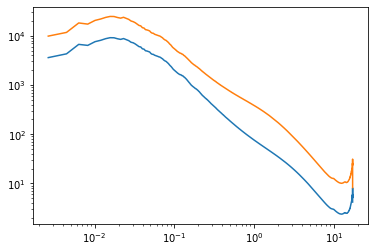

In [6]:
plt.loglog(powerspec.k[idx_247],powerspec.pk[idx_247])
plt.loglog(powerspec.k[idx_247],powerspec.pk[idx_499])

In [7]:
scaled, scaler = log_standard(powerspec.pk)
smoothed = savgol(scaled)
unscaled = unscale(smoothed,scaler)

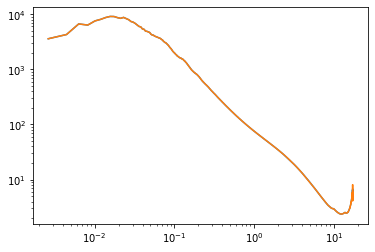

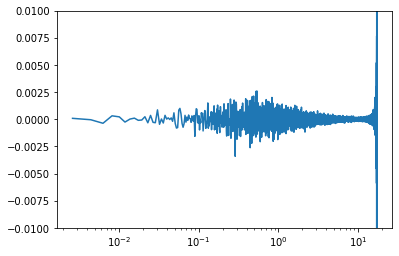

In [8]:
plt.loglog(powerspec.k[idx_247],unscaled[idx_247])
plt.loglog(powerspec.k[idx_247],powerspec.pk[idx_247])
plt.figure()
plt.plot(powerspec.k[idx_247], (powerspec.pk[idx_247]-unscaled[idx_247])/unscaled[idx_247])
plt.xscale('log')
plt.ylim([-0.01,0.01])
plt.show()

In [9]:

from emulator_utils.linear_theory_ccl import linear_addition
from emulator_utils.linear_theory_ccl import linear_addition_weighted
params = [0.119,0.0224,0.8,0.71,0.96] # note that this is entirely the wrong cosmology, hence the scaling is needed 
new_k = np.logspace(-3,0.7,1000)
k_handover = [0.03,0.035]
z=1
pk_new = linear_addition(powerspec.k[idx_247],powerspec.pk[idx_247],new_k,k_handover,params,z)
pk_new_0 = linear_addition(powerspec.k[idx_499],powerspec.pk[idx_499],new_k,k_handover,params,0)

pk_new2 = linear_addition_weighted(powerspec.k[idx_247],powerspec.pk[idx_247],new_k,k_handover[0],params,z)

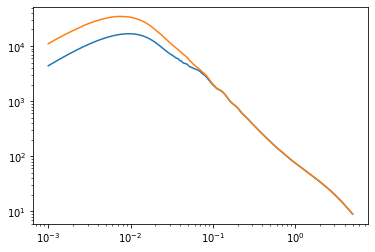

In [10]:
plt.loglog(new_k,pk_new)
plt.loglog(new_k,pk_new2)

[918 939 973]
3 [2.51188643 3.00453853 4.01516784] [26.10975394 20.43426657 13.06848124]
[918 939 973]
3 [2.51188643 3.00453853 4.01516784] [122.39070526  92.10203321  56.23426933]


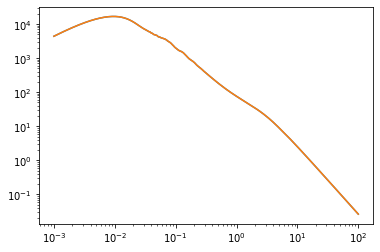

In [11]:
from emulator_utils.high_k_extrap import extend_pk

k_pnts = [2.5,3.0,4.0]
k_hk = np.logspace(-3,2,1000)
pk_hk = extend_pk(new_k,pk_new,k_pnts,k_hk)
pk_hk0 = extend_pk(new_k,pk_new_0,k_pnts,k_hk)

# should make it a weighted addition
plt.loglog(k_hk,pk_hk)
plt.loglog(k_hk,pk_hk)

plt.show()

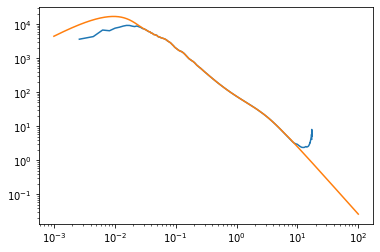

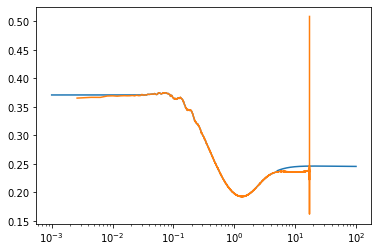

In [12]:
plt.loglog(powerspec.k[idx_247],powerspec.pk[idx_247])
plt.loglog(k_hk,pk_hk)
plt.figure()
plt.plot(k_hk,pk_hk/pk_hk0)
plt.plot(powerspec.k[idx_247],powerspec.pk_ratio[idx_247])
plt.xscale('log')